# Eat Safe, Love

## Notebook Set Up

In [3]:
# Import dependencies
from pymongo import MongoClient
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Create an instance of MongoClient
mongo = MongoClient(port=27017)

In [5]:
# assign the uk_food database to a variable name
db = mongo['uk_food']

In [6]:
# review the collections in our database
print(db.list_collection_names())

['establishments']


In [7]:
# assign the collection to a variable
establishments = db['establishments']

## Part 3: Exploratory Analysis
Unless otherwise stated, for each question: 
* Use `count_documents` to display the number of documents contained in the result.
* Display the first document in the results using `pprint`.
* Convert the result to a Pandas DataFrame, print the number of rows in the DataFrame, and display the first 10 rows.

### 1. Which establishments have a hygiene score equal to 20?

In [8]:
# Find the establishments with a hygiene score of 20
query = {"scores.Hygiene": 20}

# Use count_documents to display the number of documents in the result
print("Number of establishments with a hygiene score of 20:", establishments.count_documents(query))

# Display the first document in the results using pprint
limit_conditions = 1
results = establishments.find(query)
pprint(list(results.limit(limit_conditions)))

Number of establishments with a hygiene score of 20: 41
[{'AddressLine1': '5-6 Southfields Road',
  'AddressLine2': 'Eastbourne',
  'AddressLine3': 'East Sussex',
  'AddressLine4': '',
  'BusinessName': 'The Chase Rest Home',
  'BusinessType': 'Caring Premises',
  'BusinessTypeID': 5,
  'ChangesByServerID': 0,
  'Distance': 4613.888288172291,
  'FHRSID': 110681,
  'LocalAuthorityBusinessID': '4029',
  'LocalAuthorityCode': '102',
  'LocalAuthorityEmailAddress': 'Customerfirst@eastbourne.gov.uk',
  'LocalAuthorityName': 'Eastbourne',
  'LocalAuthorityWebSite': 'http://www.eastbourne.gov.uk/foodratings',
  'NewRatingPending': False,
  'Phone': '',
  'PostCode': 'BN21 1BU',
  'RatingDate': '2021-09-23T00:00:00',
  'RatingKey': 'fhrs_0_en-gb',
  'RatingValue': 0,
  'RightToReply': '',
  'SchemeType': 'FHRS',
  '_id': ObjectId('64455b3b254d6a78cb95324e'),
  'geocode': {'latitude': 50.769705, 'longitude': 0.27694},
  'links': [{'href': 'https://api.ratings.food.gov.uk/establishments/110681',

In [11]:
# Convert the result to a Pandas DataFrame
results = establishments.find(query)
hygenic_establishments_df = pd.json_normalize(results)
# Display the number of rows in the DataFrame
print("Rows in DataFrame: ", len(hygenic_establishments_df))
# Display the first 10 rows of the DataFrame
hygenic_establishments_df.head(10)

Rows in DataFrame:  40


,_id,FHRSID,ChangesByServerID,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,AddressLine1,AddressLine2,AddressLine3,...,geocode.longitude,geocode.latitude,meta.dataSource,meta.extractDate,meta.itemCount,meta.returncode,meta.totalCount,meta.totalPages,meta.pageSize,meta.pageNumber
0,64455b3b254d6a78cb9535e6,612039,0,1970/FOOD,Brenalwood,Caring Premises,5,Hall Lane,Walton-on-the-Naze,Essex,...,1.278721,51.857536,None,0001-01-01T00:00:00,0,None,0,0,0,0
1,64455b3b254d6a78cb9538da,730933,0,1698/FOOD,Melrose Hotel,Hotel/bed & breakfast/guest house,7842,53 Marine Parade East,Clacton On Sea,Essex,...,1.159270,51.789429,None,0001-01-01T00:00:00,0,None,0,0,0,0
2,64455b3b254d6a78cb953ac3,172735,0,PI/000023858,Seaford Pizza,Takeaway/sandwich shop,7844,4 High Street,Seaford,East Sussex,...,0.102020,50.770885,None,0001-01-01T00:00:00,0,None,0,0,0,0
3,64455b3b254d6a78cb953ad6,172953,0,PI/000024532,Golden Palace,Restaurant/Cafe/Canteen,1,5 South Street,Seaford,East Sussex,...,0.101446,50.770724,None,0001-01-01T00:00:00,0,None,0,0,0,0
4,64455b3b254d6a78cb954475,512854,0,12/00816/BUTH,Ashby's Butchers,Retailers - other,4613,777 Southchurch Road,Southend-On-Sea,Essex,...,0.736349,51.541448,None,0001-01-01T00:00:00,0,None,0,0,0,0
5,64455b3b254d6a78cb954695,1537089,0,22/00224/RESTUN,South Sea Express Cuisine,Restaurant/Cafe/Canteen,1,33 Alexandra Street,Southend-on-sea,Essex,...,0.712167,51.535007,None,0001-01-01T00:00:00,0,None,0,0,0,0
6,64455b3c254d6a78cb955bc6,155648,0,EH/00006058,Golden Palace,Takeaway/sandwich shop,7844,7 London Road,Rayleigh,Essex,...,0.602364,51.591515,None,0001-01-01T00:00:00,0,None,0,0,0,0
7,64455b3c254d6a78cb956006,1012883,0,17/00110/MIXED/S,The Tulip Tree,Restaurant/Cafe/Canteen,1,3 The Village,Chiddingstone,KENT,...,0.146450,51.185947,None,0001-01-01T00:00:00,0,None,0,0,0,0
8,64455b3c254d6a78cb956822,644109,0,41811,F & S,Retailers - other,4613,,81 Southernhay,Basildon,...,0.462307,51.570050,None,0001-01-01T00:00:00,0,None,0,0,0,0
9,64455b3c254d6a78cb956888,267034,0,11/00102/MIXED,Longhouse,Restaurant/Cafe/Canteen,1,17 London Road,Riverhead,KENT,...,0.169685,51.284795,None,0001-01-01T00:00:00,0,None,0,0,0,0


### 2. Which establishments in London have a `RatingValue` greater than or equal to 4?

In [16]:
# Find the establishments with London as the Local Authority and has a RatingValue greater than or equal to 4.
query = {"LocalAuthorityName": {'$regex': "London"},"RatingValue" : {'$gte': 4}}

# Use count_documents to display the number of documents in the result
print("Number of establishments in the City of London with a Rating of 4 or above:", establishments.count_documents(query))
# Display the first document in the results using pprint
limit_conditions = 1
results = establishments.find(query)
pprint(list(results.limit(limit_conditions)))



Number of establishments in the City of London with a Rating of 4 or above: 33
[{'AddressLine1': 'Oak Apple Farm Building 103 Sheernes Docks',
  'AddressLine2': 'Sheppy Kent',
  'AddressLine3': '',
  'AddressLine4': '',
  'BusinessName': "Charlie's",
  'BusinessType': 'Other catering premises',
  'BusinessTypeID': 7841,
  'ChangesByServerID': 0,
  'Distance': 4627.439467780196,
  'FHRSID': 621707,
  'LocalAuthorityBusinessID': 'PI/000025307',
  'LocalAuthorityCode': '508',
  'LocalAuthorityEmailAddress': 'publicprotection@cityoflondon.gov.uk',
  'LocalAuthorityName': 'City of London Corporation',
  'LocalAuthorityWebSite': 'http://www.cityoflondon.gov.uk/Corporation/homepage.htm',
  'NewRatingPending': False,
  'Phone': '',
  'PostCode': 'ME12',
  'RatingDate': '2021-10-18T00:00:00',
  'RatingKey': 'fhrs_4_en-gb',
  'RatingValue': 4,
  'RightToReply': '',
  'SchemeType': 'FHRS',
  '_id': ObjectId('64455b3b254d6a78cb954c67'),
  'geocode': {'latitude': 51.369321, 'longitude': 0.508551},


In [13]:
# Convert the result to a Pandas DataFrame
results = establishments.find(query)
City_of_London_good_establishments_df = pd.json_normalize(results)
# Display the number of rows in the DataFrame
print("Rows in DataFrame: ", len(City_of_London_good_establishments_df))
# Display the first 10 rows of the DataFrame
City_of_London_good_establishments_df.head(10)

Rows in DataFrame:  32


,_id,FHRSID,ChangesByServerID,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,AddressLine1,AddressLine2,AddressLine3,...,geocode.longitude,geocode.latitude,meta.dataSource,meta.extractDate,meta.itemCount,meta.returncode,meta.totalCount,meta.totalPages,meta.pageSize,meta.pageNumber
0,64455b3c254d6a78cb954f8e,1130836,0,PI/000034075,Mv City Cruises Erasmus,Other catering premises,7841,Cherry Garden Pier,Cherry Garden Street Rotherhithe,Charlton,...,0.249256,51.123623,None,0001-01-01T00:00:00,0,None,0,0,0,0
1,64455b3c254d6a78cb955ade,293783,0,PI/000002614,Benfleet Motor Yacht Club,Other catering premises,7841,Ferry Road,South Benfleet Essex,,...,0.561954,51.543831,None,0001-01-01T00:00:00,0,None,0,0,0,0
2,64455b3c254d6a78cb9568dd,1315095,0,PI/000036464,Coombs Catering t/a The Lock and Key,Restaurant/Cafe/Canteen,1,Leslie Ford House,Tilbury,Charlton,...,0.346337,51.464066,None,0001-01-01T00:00:00,0,None,0,0,0,0
3,64455b3c254d6a78cb9568de,294474,0,PI/000014647,Tilbury Seafarers Centre,Restaurant/Cafe/Canteen,1,Tenants Row Tilbury Docks,Tilbury Essex,,...,0.346325,51.464078,None,0001-01-01T00:00:00,0,None,0,0,0,0
4,64455b3c254d6a78cb956fe6,294900,0,PI/000019066,Mv Valulla,Other catering premises,7841,Reeds River Cruises LtdKings ReachRiver Thames...,London,,...,0.287555,51.504071,None,0001-01-01T00:00:00,0,None,0,0,0,0
5,64455b3d254d6a78cb9590f4,293756,0,PI/000002538,Tereza Joanne,Other catering premises,7841,Funcraft UK Ltd King George V Dock Woolwich Ma...,London,,...,0.069286,51.501121,None,0001-01-01T00:00:00,0,None,0,0,0,0
6,64455b3d254d6a78cb9594bb,878523,0,PI/000029844,Brick Lane Brews,Restaurant/Cafe/Canteen,1,Air side London City Airport,London,,...,0.048006,51.503733,None,0001-01-01T00:00:00,0,None,0,0,0,0
7,64455b3d254d6a78cb9594d3,293772,0,PI/000002585,The Nuance Group (UK) Limited,Retailers - other,4613,Duty Free Shop Passenger Terminal,London City AirportRoyal DocksLondon,,...,0.047966,51.504112,None,0001-01-01T00:00:00,0,None,0,0,0,0
8,64455b3d254d6a78cb9594d4,294606,0,PI/000016185,WH Smith,Retailers - other,4613,London City Airport,Silvertown London,,...,0.047966,51.504112,None,0001-01-01T00:00:00,0,None,0,0,0,0
9,64455b3d254d6a78cb9594d5,295107,0,PI/000020749,City Bar & Grill,Restaurant/Cafe/Canteen,1,London City Airport (Airside),London,,...,0.047966,51.504112,None,0001-01-01T00:00:00,0,None,0,0,0,0


### 3. What are the top 5 establishments with a `RatingValue` rating value of 5, sorted by lowest hygiene score, nearest to the new restaurant added, "Penang Flavours"?

In [18]:
# Search within 0.01 degree on either side of the latitude and longitude.
# Rating value must equal 5
# Sort by hygiene score

degree_search = 0.01
latitude = 51.49014200
longitude = 0.08384000

query = {"RatingValue": 5,
        "geocode.latitude": {'$gte': latitude - degree_search, '$lt': latitude + degree_search},
        "geocode.longitude": {'$gte': longitude - degree_search, '$lt': longitude + degree_search}
        }
sort =  [("scores.Hygiene", -1)]
limit = 5

results = establishments.find(query).sort(sort).limit(limit)

# Print the results
for result in results:
    pprint(result)

{'AddressLine1': '101 Plumstead High Street',
 'AddressLine2': '',
 'AddressLine3': 'Plumstead',
 'AddressLine4': 'Greenwich',
 'BusinessName': 'Lucky Food & Wine',
 'BusinessType': 'Retailers - other',
 'BusinessTypeID': 4613,
 'ChangesByServerID': 0,
 'Distance': 4647.024793263386,
 'FHRSID': 695287,
 'LocalAuthorityBusinessID': 'PI/000182135',
 'LocalAuthorityCode': '511',
 'LocalAuthorityEmailAddress': 'health@royalgreenwich.gov.uk',
 'LocalAuthorityName': 'Greenwich',
 'LocalAuthorityWebSite': 'http://www.royalgreenwich.gov.uk',
 'NewRatingPending': False,
 'Phone': '',
 'PostCode': 'SE18 1SB',
 'RatingDate': '2022-06-25T00:00:00',
 'RatingKey': 'fhrs_5_en-gb',
 'RatingValue': 5,
 'RightToReply': '',
 'SchemeType': 'FHRS',
 '_id': ObjectId('64455b3d254d6a78cb958b4d'),
 'geocode': {'latitude': 51.4878934, 'longitude': 0.0910104},
 'links': [{'href': 'http://api.ratings.food.gov.uk/establishments/695287',
            'rel': 'self'}],
 'meta': {'dataSource': None,
          'extractD

In [19]:
# Convert the result to a Pandas DataFrame
results = establishments.find(query).sort(sort).limit(limit)
close_5star_restaurants_df = pd.json_normalize(results)
close_5star_restaurants_df

,_id,FHRSID,ChangesByServerID,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,AddressLine1,AddressLine2,AddressLine3,...,geocode.longitude,geocode.latitude,meta.dataSource,meta.extractDate,meta.itemCount,meta.returncode,meta.totalCount,meta.totalPages,meta.pageSize,meta.pageNumber
0,64455b3d254d6a78cb958b39,694606,0,PI/000116584,Fineway Cash & Carry,Retailers - other,4613,112 Plumstead High Street,,Plumstead,...,0.090938,51.487609,None,0001-01-01T00:00:00,0,None,0,0,0,0
1,64455b3d254d6a78cb958b66,695566,0,PI/000188497,Premier Express,Retailers - other,4613,102 Plumstead High Street,,Plumstead,...,0.090455,51.487723,None,0001-01-01T00:00:00,0,None,0,0,0,0
2,64455b3d254d6a78cb958b9c,1298993,0,13950,The Plumstead Pantry,Restaurant/Cafe/Canteen,1,16 Warwick Terrace,,Plumstead,...,0.083745,51.481773,None,0001-01-01T00:00:00,0,None,0,0,0,0
3,64455b3d254d6a78cb958b72,695033,0,PI/000172986,Everest Stores Ltd,Retailers - other,4613,104 Plumstead High Street,,Plumstead,...,0.090323,51.487672,None,0001-01-01T00:00:00,0,None,0,0,0,0
4,64455b3d254d6a78cb958a57,1069652,0,PI/000206841,TIWA N TIWA African Restaurant Ltd,Restaurant/Cafe/Canteen,1,152 Plumstead High Street,,Plumstead,...,0.092743,51.487035,None,0001-01-01T00:00:00,0,None,0,0,0,0


### 4. How many establishments in each Local Authority area have a hygiene score of 0?

In [18]:
# Create a pipeline that: 
# 1. Matches establishments with a hygiene score of 0
match_query = {'$match': {'scores.Hygiene': 0}}
# 2. Groups the matches by Local Authority
group_query = {'$group': {'_id': '$LocalAuthorityName', 'count': { '$sum': 1 }}}
# 3. Sorts the matches from highest to lowest
sort_values = {'$sort': { 'count': -1 }}

#put the pipeline together
pipeline = [match_query, group_query, sort_values]

#Return the aggregrate method as a list:
results = list(establishments.aggregate(pipeline))

# Print the number of documents in the result
print("Number of documents in result: ", len(results))

# Print the first 10 results
pprint(results[0:10])

Number of documents in result:  55
[{'_id': 'Thanet', 'count': 1130},
 {'_id': 'Greenwich', 'count': 882},
 {'_id': 'Maidstone', 'count': 713},
 {'_id': 'Newham', 'count': 711},
 {'_id': 'Swale', 'count': 686},
 {'_id': 'Chelmsford', 'count': 680},
 {'_id': 'Medway', 'count': 672},
 {'_id': 'Bexley', 'count': 607},
 {'_id': 'Southend-On-Sea', 'count': 586},
 {'_id': 'Tendring', 'count': 542}]


In [20]:
# Convert the result to a Pandas DataFrame
low_hygiene_establishments_count_df = pd.DataFrame(results)
# Display the number of rows in the DataFrame
print("Rows in DataFrame: ", len(low_hygiene_establishments_count_df))
# Display the first 10 rows of the DataFrame
low_hygiene_establishments_count_df.head(10)

Rows in DataFrame:  55


,_id,count
0,Thanet,1130
1,Greenwich,882
2,Maidstone,713
3,Newham,711
4,Swale,686
5,Chelmsford,680
6,Medway,672
7,Bexley,607
8,Southend-On-Sea,586
9,Tendring,542


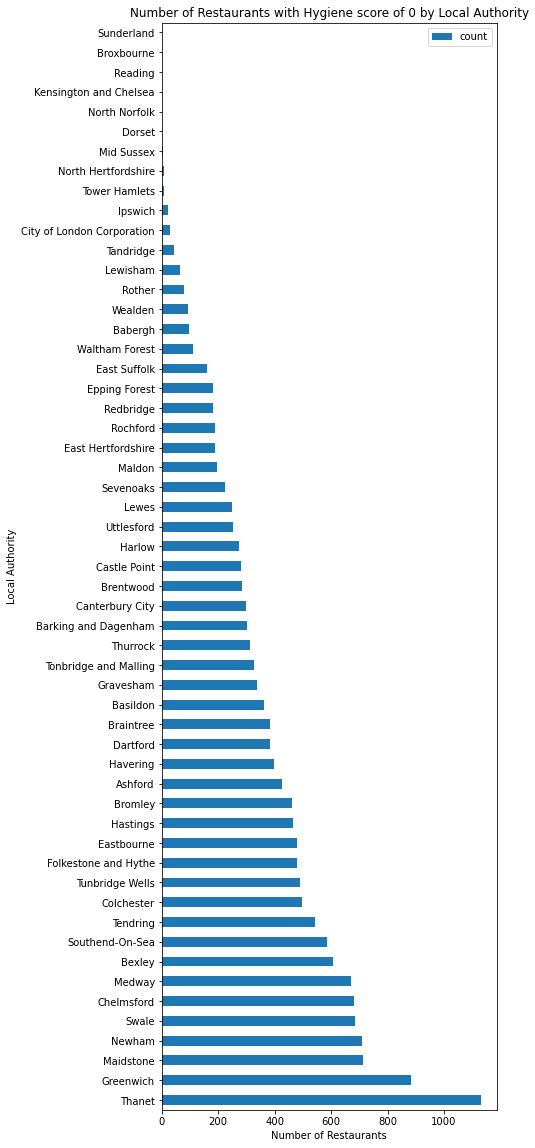

In [26]:
low_hygiene_establishments_count_df.plot(kind="barh", x="_id", y="count",
                                         title="Number of Restaurants with Hygiene score of 0 by Local Authority",
                                        figsize=(6,20))
plt.xlabel("Number of Restaurants")
plt.ylabel("Local Authority")
plt.savefig("Output/Hygiene_0_establishments.png", bbox_inches = "tight")
plt.show()